# K-Nearest Neighbours

In [80]:
import sklearn.neighbors
sklearn.neighbors.__all__


['BallTree',
 'DistanceMetric',
 'KDTree',
 'KNeighborsClassifier',
 'KNeighborsRegressor',
 'KNeighborsTransformer',
 'NearestCentroid',
 'NearestNeighbors',
 'RadiusNeighborsClassifier',
 'RadiusNeighborsRegressor',
 'RadiusNeighborsTransformer',
 'kneighbors_graph',
 'radius_neighbors_graph',
 'KernelDensity',
 'LocalOutlierFactor',
 'NeighborhoodComponentsAnalysis',
 'VALID_METRICS',
 'VALID_METRICS_SPARSE']

In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [39]:
dataset = load_iris()

x = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
y = dataset.target

In [40]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [64]:
knn = KNeighborsClassifier()
knn.__dict__

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform'}

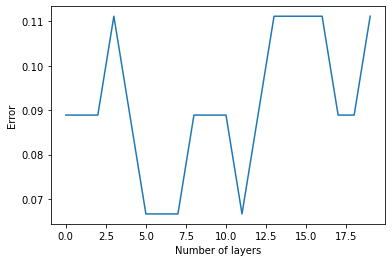

In [65]:
error = []

for i in range(20):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred!=y_test))
    
plt.xlabel("Number of layers")
plt.ylabel("Error")
plt.plot(error)

In [66]:
knn = KNeighborsClassifier(n_neighbors = np.argmin(error))
knn.__dict__
np.argmin(error)

5

In [67]:
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9111111111111111

In [68]:
pred = knn.predict(x_test)

In [69]:
print(confusion_matrix(y_test, pred))

[[14  0  0]
 [ 0 13  1]
 [ 0  3 14]]


In [70]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.81      0.93      0.87        14
           2       0.93      0.82      0.87        17

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45

